In [1]:
import sys
import matplotlib.pyplot as plt

import numpy as np
from scipy.integrate import solve_ivp

print (sys.version)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
3.10.4 (main, Mar 31 2022, 03:38:35) [Clang 12.0.0 ]


In [2]:
#Indirect Solution

def rd_eq_new(m_gw, k, a_func):
    def diff_eq(eta, y):
        g = y[0]
        v = y[1]
        return [v, -(2 * v / eta) - g*(k**2 + (a_func(eta) * m_gw)**2)]
    return diff_eq

def simulator(m_gw, k, a_func, confTuple, era_func):
    if (confTuple[0] == confTuple[1]):
        return 1
    
    #range of conf time values
    eta_range = np.logspace(confTuple[0], confTuple[1], confTuple[2])
    
    #solve over time range
    sol = solve_ivp(era_func(m_gw, k, a_func), t_span = [eta_range[0], eta_range[-1]], y0 = [1, 0], t_eval = eta_range)
    
    #return last value of array
    return sol.y[0][-1]


[2.02662632e+08 2.02833238e+08 2.04893362e+08 2.28060037e+08
 8.95085360e+07 1.45421805e+07 9.45505753e+06 2.45803976e+06
 1.07575909e+07 4.97206956e+07]


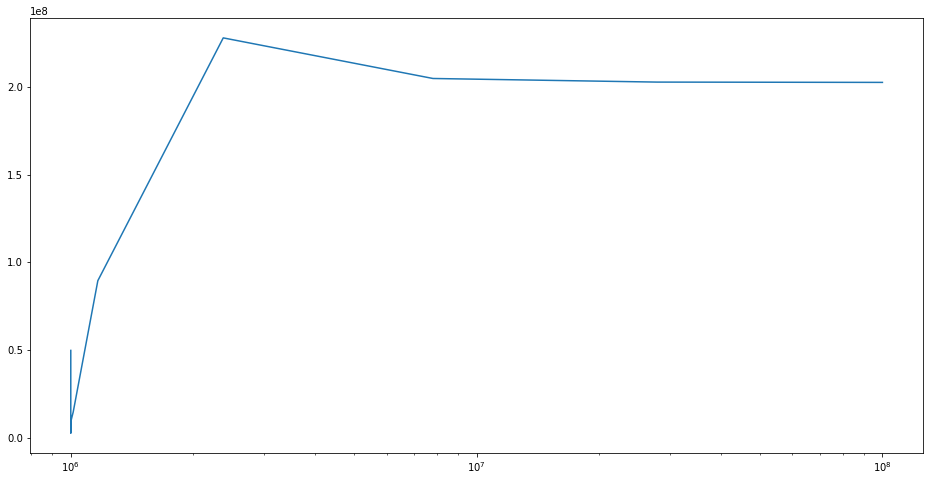

In [6]:
sc = 8
plt.figure(figsize=(sc * 2, sc * 1))
plt.xscale('log', base = 10)

# plt.xlabel(xl, fontsize = 15)
# plt.ylabel(yl, fontsize = 15)
# plt.title(tl, fontsize = 15)

#test k value
k = 1
m_gw = 1

def a_rd(e): 
    return e

#generate eta range and omega values
etas = np.logspace(-5, 0, 10)
omegas = np.sqrt((k / a_rd(etas))**2 + m_gw**2)
pairs = np.array((etas, omegas)).T

#takes in a pair
def ps_mg(eta, w):
    k1 = a_rd(eta) * np.sqrt(w**2 - m_gw**2)
    prefactors = (w**2 / (w**2 - m_gw**2)) * (2 * k**3 / np.pi**2)
    sim =  simulator(m_gw, k1, a_rd, (-5, np.log10(eta), 100), rd_eq_new) ** 2
    return prefactors * sim

#use vectorization
vec_ps_mg = np.vectorize(ps_mg)

#resulting power spectrum ?
res_mg = vec_ps_mg(etas, omegas)
print(res_mg)

plt.plot(omegas, res_mg,)


In [4]:
a = [3, 4, 5]

def foo(x, y, z):
    return np.sum(np.linspace(x, y, z))

vecfoo = np.vectorize(foo)

print(vecfoo([1, 2, 3], [4, 5, 6], a))


[ 7.5 14.  22.5]
